# Data Redundancy

Understand the impact of redundancy on storage overhead and data integrity risks.

The layout of our updated `SalesData` table is as follows:

**`DESCRIBE SalesData;`**

| Field | Type | Null | Key | Default | Extra |
| --- | --- | --- | --- | --- | --- |
| SaleID | int(11) | NO | PRI | NULL | |
| SalesPerson | char(15) | YES | NULL | |
| SaleDate | date | YES | NULL | |	
| ProductCategory | char(30) | YES | NULL | |
| ProductName | char(25) | YES | NULL | |
| Quantity | int(11) | YES | NULL | |
| Price | decimal(8,2) | YES | NULL | |


## Identifying redundant data in the `SalesData` table

* Is there any information needlessly repeated?
* Can certain field values be derived from others based on the given information?
* Is there a correlation among field values that lets us figure out one field’s exact value by inspecting another within the same record?
* Does a value in one field consistently uniquely identify the value in another field?

It’s apparent that simply by observing the `ProductName`, we can deduce the corresponding `ProductCategory`. 
* That is, within this structure, every sale entry duplicates information regarding the `ProductCategory` for each `ProductName` sold.
* However, the other way round **(`ProductCategory → ProductName`) is not true**.
* For instance, with every sale of a `Keyboard`, its product category as `Electronics` is also logged.

> Should a salesperson within this organization be linked exclusively to a single product category, a similar interdependence would be established between the **`SalesPerson`** and **`ProductCategory`**. For instance, upon receiving the salesperson's name `Alice`, we can establish the related product category as `Furniture`.


## Challenges posed by redundancy

* Data redundancy brings forth significant challenges, with storage overhead and data integrity ranking among the most prominent.
* Storage overhead causes an unnecessary increase in database size due to redundant information.
* Data integrity issues are even more critical, as duplicated data can lead to inconsistencies and inaccurate query results.

## Solving redundancy through database redesign

**Absolutely!**
* One approach involves redesigning the database layout to avoid repeating the same information across different entries. 
* By reorganizing how data is stored, such as consolidating repetitive details into separate tables, we can minimize duplication.
* This reorganization focuses on improving data storage efficiency and maintaining consistency throughout the database, effectively addressing the challenges brought on by redundancy.
* In this instance, we can address redundancy by extracting this information from the current table and storing the `ProductCategory`, `ProductName`, and the corresponding `Price` in a separate table.

**Create a new table Product**

```sql
CREATE TABLE Product (
    ProductID INT PRIMARY KEY
    AUTO_INCREMENT, -- Incrementally generate values for the primary key
    ProductName CHAR(50) NOT NULL,
    ProductCategory CHAR(50) NOT NULL,
    Price INT NOT NULL
) AUTO_INCREMENT=101; -- Assign 101 as the starting value for the primary key

-- Verify the table creation
DESCRIBE Product;
```

Now, we have the task of populating this table with product information by transferring data from the `SalesData` table to the `Product` table. Manual execution is a feasible option, but it is labor-intensive and prone to errors. SQL provides a more efficient and error-free approach by allowing us to redirect the results of a `SELECT` statement to an `INSERT` statement.

```sql
INSERT INTO Product (ProductName, ProductCategory, Price)
SELECT DISTINCT ProductName, ProductCategory, Price
FROM SalesData;
-- WHERE criteria;
```

## Removing redundant information

* We have moved the `ProductCategory`, `ProductName`, and `Price` to `Product` table. 
* So, we can drop these three columns from our `SalesData` table.

```sql
ALTER TABLE SalesData
DROP COLUMN ProductName,
DROP COLUMN ProductCategory,
DROP COLUMN price;
```

**`DESCRIBE SalesData;`**

| Field | Type | Null | Key | Default | Extra |
| --- | --- | --- | --- | --- | --- |
| SaleID | int(11) | NO | PRI | NULL | |
| SalesPerson | char(15) | YES | NULL | |
| SaleDate | date | YES | NULL | |	
| Quantity | int(11) | YES | NULL | |


## Establishing connections between multiple tables

Wait. 
* How do we establish the connection between sales records and their respective products? 
* Is that crucial information now inaccessible?

**Sadly, the answer is yes. We have indeed lost it, and without a backup, there's no way to retrieve it**.

> Naturally, of course, the question then becomes how can we do this the right way?

* Before rearranging the data structure and removing any content from a table, it's essential to confirm that the transferred information to another table remains accessible and can be linked appropriately.
* This precaution ensures that no information is lost during this process.

# Foreign Keys and Database Relationships

Learn how a foreign key connects tables for coherence.

## Understanding foreign keys in database

To establish a connection between two tables, the primary key of one table (also called the parent table) is utilized as a reference point within the other table. When utilized in a different table, this primary key is referred to as a foreign key.

Foreign keys are instrumental in establishing relationships between tables, ensuring data coherence. Foreign keys act as bridges between tables, ensuring data integrity and logical connections.

For instance, to merge data from the recently created `Product` table with our modified `SalesData` table, we can utilize the `ProductID`, the primary key of the `Product` table, as a foreign key within the `SalesData` table.

## Add a foreign key to the table

We can add a foreign key to a table in the following two ways:
1. Add a foreign key using the **`CREATE TABLE`** statement
2. Add a foreign key using the **`ALTER TABLE`** statement

## Foreign key using `CREATE TABLE`

We can utilize the following syntax to define a foreign key while creating a table.

```sql
CREATE TABLE table_name (
column1 datatype1,
column2 datatype2,
column3 datatype3,
...
PRIMARY KEY (column_name),
FOREIGN KEY (fk_column) REFERENCES parent_table(rf_column)
);
```

## Foreign key using `ALTER TABLE`

If the table is already in place, we can employ the **`ALTER TABLE`** command to designate a column as the foreign key.

```sql
ALTER TABLE table_name
ADD FOREIGN KEY (fk_column) REFERENCES parent_table(rf_column);
```

## Establish relationship between `Product` table and `SalesData` table

In order to combine information from the `Product` table and the `SalesData` table, we first need to add a new column named `ProductID` to the `SalesData` table.

```sql
ALTER TABLE SalesData
ADD COLUMN ProductID INT;
```

Next, we populate this column with the relevant data corresponding to the products listed in each record. 

Once the data has been accurately inserted into the new column, we can designate `ProductID` as the foreign key to the `SalesData` table.

```sql
ALTER TABLE SalesData
ADD FOREIGN KEY (ProductID) REFERENCES Product(ProductID);
```

**`Describe SalesData;`**

| Field | Type | Null | Key | Default | Extra |
| --- | --- | --- | --- | --- | --- |
| SaleID | int(11) | NO | PRI | NULL | |
| SalesPerson | char(15) | YES | NULL | |
| SaleDate | date | YES | NULL | |	
| Quantity | int(11) | YES | NULL | |
| ProductID | int(11) | YES | NULL | |

* It is now feasible to eliminate **`ProductName`** and **`ProductCategory`** from this table. 
* Each table now houses specific information, forming a network connected by foreign keys.
* This connection forms the basis of **referential integrity**.

> **What is meant by referential integrity and how is it related to the foreign keys?**
> 
> **Referential integrity** is a fundamental concept in relational databases that ensures the consistency and accuracy of relationships between tables. Foreign keys maintain referential integrity by ensuring that relationships between tables remain valid. This means that a foreign key value must either be null or match a primary key value in the referenced table. Stated differently, it is impermissible for a foreign key to assume any value that does not correspond to a primary key value existing in the referenced table. This restriction ensures the coherence and accuracy of the relational structure between the tables.

In this setup, the `SalesData` table refers to a `ProductID` within the `Product` table. This separation categorizes products into their dedicated table, enhancing data organization, minimizing repetition, and streamlining the administration and updating of product details across various items.

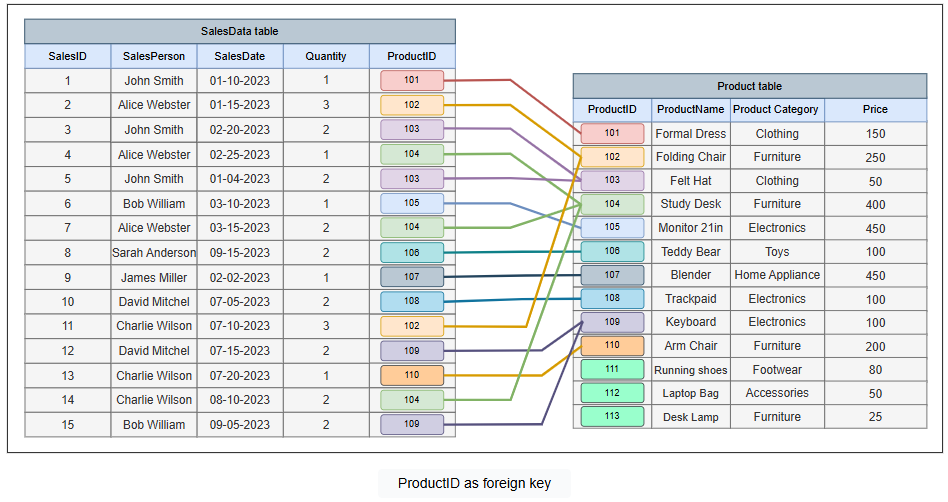

> **Note**: The field designated as the foreign key doesn’t necessarily need to have the same name as the primary key field in the linked table.
